In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# Define path to dataset
data_dir = 'yoga_dataset'
img_height, img_width = 150, 150
batch_size = 8

# Use ImageDataGenerator to load images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
def clean_invalid_images(root_dir):
    supported_formats = ('.jpg', '.jpeg', '.png')
    removed = 0
    for subdir, _, files in os.walk(root_dir):
        for file in files:
            file_path = os.path.join(subdir, file)
            if not file.lower().endswith(supported_formats):
                os.remove(file_path)
                removed += 1
                continue
            try:
                img = Image.open(file_path)
                img.verify()  # Check if the image can be opened
            except:
                os.remove(file_path)
                removed += 1
    print(f"Removed {removed} invalid or unsupported images.")

clean_invalid_images("yoga_dataset")

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Removed 0 invalid or unsupported images.
Found 440 images belonging to 7 classes.
Found 107 images belonging to 7 classes.


In [ ]:
#Design the model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.4), 
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\shres\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 17, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 458,791 (1.75 MB)

 Trainable params: 458,791 (1.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[early_stop]
)

c:\Users\shres\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - accuracy: 0.2058 - loss: 1.9028 - val_accuracy: 0.2523 - val_loss: 1.9077
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.2685 - loss: 1.8845 - val_accuracy: 0.2523 - val_loss: 1.8749
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.2301 - loss: 1.8547 - val_accuracy: 0.3551 - val_loss: 1.6931
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.4048 - loss: 1.5959 - val_accuracy: 0.4766 - val_loss: 1.4098
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - accuracy: 0.5081 - loss: 1.2960 - val_accuracy: 0.5421 - val_loss: 1.3806
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.5892 - loss: 1.1553 - val_accuracy: 0.5514 - val_loss: 1.2476
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.6611 - loss: 0.8989 - val_accuracy: 0.6075 - val_loss: 1.1729
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - accuracy: 0.7081 - loss: 0.8346 - val_accuracy: 0.

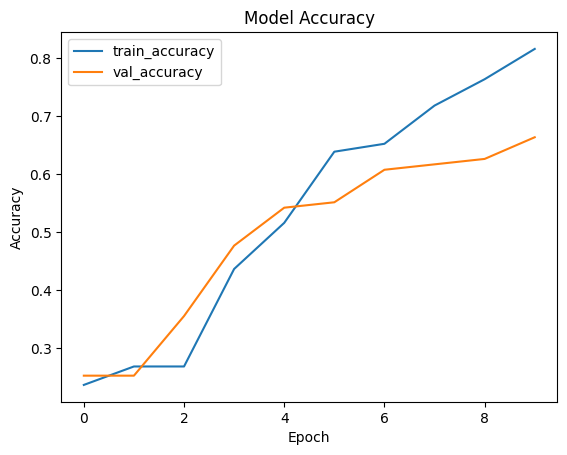

In [ ]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

In [ ]:
model.save("yoga_pose_cnn_model.h5")


In [ ]:
import cv2
import numpy as np
import tensorflow as tf

# Define image size (must match training size)
img_height, img_width = 224, 224  # Update if your model used a different size

# Load the model
model = tf.keras.models.load_model("yoga_pose_cnn_model.h5")
class_names = list(train_data.class_indices.keys())  # from your ImageDataGenerator

# Start webcam
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess image
    img = cv2.resize(frame, (150, 150))                 # Resize to match model
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)          # Convert to RGB
    img = img.astype('float32') / 255.0                 # Normalize
    img_array = np.expand_dims(img, axis=0)      ;
    print("Model expects:", model.input_shape)
    print("Input shape given:", img_array.shape)


    # Predict
    pred = model.predict(img_array)
    predicted_index = np.argmax(pred)
    confidence = pred[0][predicted_index]
    predicted_label = class_names[predicted_index]

    # Set color based on confidence
    if confidence > 0.9:
        color = (0, 255, 0)  # Green for correct pose
    else:
        color = (0, 0, 255)  # Red for low confidence

    # Display prediction
    cv2.putText(frame, f'{predicted_label} ({confidence*100:.1f}%)', (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    cv2.imshow('Yoga Pose Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Model expects: (None, 150, 150, 3)
Input shape given: (1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Model expects: (None, 150, 150, 3)
Input shape given: (1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Model expects: (None, 150, 150, 3)
Input shape given: (1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Model expects: (None, 150, 150, 3)
Input shape given: (1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Model expects: (None, 150, 150, 3)
Input shape given: (1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Model expects: (None, 150, 150, 3)
Input shape given: (1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Model expects: (None, 150, 150, 3)
Input shape given: (1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Model expects: (None, 150, 150, 3)
Input shape given: (1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Model expects: (None, 150, 150, 3)
Input shape given: (1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Model expects: (No